<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Число-комнат" data-toc-modified-id="Число-комнат-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Число комнат</a></span></li><li><span><a href="#Цена" data-toc-modified-id="Цена-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Цена</a></span></li><li><span><a href="#Высота-потолков" data-toc-modified-id="Высота-потолков-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Высота потолков</a></span></li><li><span><a href="#Срок-продажи-квартиры" data-toc-modified-id="Срок-продажи-квартиры-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Срок продажи квартиры</a></span></li><li><span><a href="#Факторы-влияющие-на-стоимость-квартиры" data-toc-modified-id="Факторы-влияющие-на-стоимость-квартиры-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Факторы влияющие на стоимость квартиры</a></span></li><li><span><a href="#Населенных-пунктов-с-наибольшим-числом-объявлений" data-toc-modified-id="Населенных-пунктов-с-наибольшим-числом-объявлений-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Населенных пунктов с наибольшим числом объявлений</a></span></li><li><span><a href="#Исследование-параметров-объектов-из-центра-Санкт-Петербурга" data-toc-modified-id="Исследование-параметров-объектов-из-центра-Санкт-Петербурга-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Исследование параметров объектов из центра Санкт-Петербурга</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.8"><span class="toc-item-num">4.8&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
import pandas as pd
re_data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
pd.set_option('display.max_columns', 22) #для отображения всех столбцов таблицы
re_data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [2]:
re_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

### Вывод

В файле 22 столбца, столбцы содержат данные о:  
***total_images*** — число фотографий квартиры в объявлении;  
***last_price*** — цена на момент снятия с публикации;  
**total_area*** — площадь квартиры в квадратных метрах (м²);  
***first_day_exposition*** — дата публикации;  
***rooms*** — число комнат;  
***ceiling_height*** — высота потолков (м);  
***floors_total*** — всего этажей в доме;  
***living_area*** — жилая площадь в квадратных метрах(м²);  
***floor*** — этаж;  
***is_apartment*** — апартаменты (булев тип);  
***studio*** — квартира-студия (булев тип);  
***open_plan*** — свободная планировка (булев тип);  
***kitchen_area*** — площадь кухни в квадратных метрах (м²);  
***balcony*** — число балконов;  
***locality_name*** — название населённого пункта;  
***airports_nearest*** — расстояние до ближайшего аэропорта в метрах (м);  
***cityCenters_nearest*** — расстояние до центра города (м);  
***parks_around3000*** — число парков в радиусе 3 км;  
***parks_nearest*** — расстояние до ближайшего парка (м);  
***ponds_around3000*** — число водоёмов в радиусе 3 км;  
***ponds_nearest*** — расстояние до ближайшего водоёма (м);  
***days_exposition*** — сколько дней было размещено объявление (от публикации до снятия).

У некоторых столбцов нужно сменить тип данных - *first_day_exposition* -> <span style="color:orange">data</span>, *floors_total* -> <span style="color:orange">int</span>, *is_apartment* -> <span style="color:orange">bool</span>, *balcony* -> int, *parks_around3000* -> <span style="color:orange">int</span>, *ponds_around3000* -> <span style="color:orange">int</span>, *days_exposition* -> <span style="color:orange">int</span>.

Строк 23699 описывающие недвижимость. Есть пропущенные значения, которые необходимо отработать. 

## Предобработка данных

Обработаем столбцы в которых отсутствуют данные
- locality_name           23650 non-null object
- floors_total            23613 non-null float64
- living_area             21796 non-null float64
- kitchen_area            21421 non-null float64
- days_exposition         20518 non-null float64
- parks_around3000        18181 non-null float64
- ponds_around3000        18181 non-null float64
- cityCenters_nearest     18180 non-null float64
- airports_nearest        18157 non-null float64
- ceiling_height          14504 non-null float64
- balcony                 12180 non-null float64
- ponds_nearest           9110 non-null float64
- parks_nearest           8079 non-null float64
- is_apartment            2775 non-null object

**Название населенного пункта** (locality_name) - в связи с тем, что пропущенных значений мало и установить месторасположение недвижимости не удастся, строки удалены. Поле должно быть обязательно для заполнения

In [3]:
# посчитаем кол-во незаполненных данных по населенным пунктам
re_data['locality_name'].isna().sum()

49

In [4]:
# удалим строки с незаполненными данными по населенному пункту
# посчитаем кол-во незаполненных данных по населенным пунктам
re_data.dropna(subset=['locality_name'], inplace=True)
re_data['locality_name'].isna().sum()

0

**Всего этажей в доме** (floors_total) - пропущеные значения удалены,т.к. заменить их не предоставляется возможным. Как и название населеного пункта можно поставить как обязательное поля для заполнения.

In [5]:
# посчитаем кол-во незаполненных данных по этажности
re_data['floors_total'].isna().sum()

85

In [6]:
# удалим строки с незаполненными данными по этажности
# заменим тип данных на int
# посчитаем кол-во незаполненных данных по этажности
re_data.dropna(subset=['floors_total'], inplace=True)
re_data['floors_total'] = re_data['floors_total'].astype('int64')
re_data['floors_total'].isna().sum()

0

**Жилая площадь в квадратных метрах(м²)** (living_area) - пропущенные данные были заполнены на основе расчета, стоимость недвижимости деленная на стоимость 1 кв метра в населенном пункте. Для этого была найдена медиана стоимости 1 кв м для каждого населенного пункта.

In [7]:
# Добавляем новый столбец, расчет стоимости 1 кв м
re_data['last_price_m2']=re_data['last_price']/re_data['living_area']
re_data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,last_price_m2
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16,51.0,8,NaN,False,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,254901.960784
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11,18.6,1,NaN,False,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,180107.526882
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5,34.3,4,NaN,False,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,151486.880466
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14,NaN,9,NaN,False,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,NaN
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14,32.0,13,NaN,False,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,312500.000000


In [8]:
# сделаем группировку по населенному пункту
# выведим группировку
group_price_m2 = re_data.groupby('locality_name')['last_price_m2'].transform('mean')
re_data.groupby('locality_name')['last_price_m2'].mean().sort_values().head()

locality_name
деревня Малая Романовка    14808.362369
деревня Старополье         14851.485149
деревня Выскатка           18856.907895
поселок Тёсово-4           20833.333333
поселок Совхозный          22600.000000
Name: last_price_m2, dtype: float64

In [9]:
group_price_m2.isna().sum()

17

In [10]:
# заполним медианной пропуски расчетом по населенным пунктам за 1 кв м
# оставшие незаполненые строки удалим
# посчитаем кол-во незаполненных
re_data['last_price_m2'].fillna(group_price_m2, inplace=True)
re_data.dropna(subset=['last_price_m2'],inplace=True)
re_data['last_price_m2'].isna().sum()

0

In [11]:
# посчитаем кол-во незаполненных данных по столбцу жилой площади в кв м
re_data['living_area'].isna().sum()

1848

In [12]:
# заполним пропуски посчитав через сумму деленую на стоимость 1 кв м
# посчитаем кол-во незаполненных
re_data['living_area'].fillna(re_data['last_price'] / re_data['last_price_m2'],inplace=True)
re_data['living_area'].isna().sum()

0

**Площадь кухни в квадратных метрах (м²)** (kitchen_area) - известно, что в студиях нет отдельной кухни, поэтому можно заполнить нулем. Остальные пропущенные данный заполним медианной

In [13]:
# в студиях нет кухни, поэтому заполним нулем
re_data.loc[re_data['studio'] == True, 'kitchen_area'] = 0

# заменим оставшиеся пропуски на медианные значения
re_data.loc[re_data['kitchen_area'].isna(), 'kitchen_area'] = re_data['kitchen_area'].describe()[5]

# посчитаем кол-во незаполненных данных
re_data['kitchen_area'].isna().sum()

0

**Сколько дней было размещено объявление (от публикации до снятия)** (days_exposition) - все пропуски в данных заменили на медианные значения.

In [14]:
# заменим пропуски на медианные значения
# посчитаем кол-во незаполненных данных
re_data.loc[re_data['days_exposition'].isna(), 'days_exposition'] = re_data['days_exposition'].describe()[5]
re_data['days_exposition'] = re_data['days_exposition'].astype('int64')
re_data['days_exposition'].isna().sum()

0

**Число парков в радиусе 3 км** (parks_around3000) - все пропуски в данных заменили на среднее значение.

In [15]:
# заменим пропуски на среднее значение
# посчитаем кол-во незаполненных данных
re_data.loc[re_data['parks_around3000'].isna(), 'parks_around3000'] = re_data['parks_around3000'].describe()[1]
re_data['parks_around3000'] = re_data['parks_around3000'].astype('int64')
re_data['parks_around3000'].isna().sum()

0

**Число водоёмов в радиусе 3 км** (ponds_around3000) - все пропуски в данных заменили на среднее значение.

In [16]:
# заменим пропуски на среднее значение
# посчитаем кол-во незаполненных данных
re_data.loc[re_data['ponds_around3000'].isna(), 'ponds_around3000'] = re_data['ponds_around3000'].describe()[1]
re_data['ponds_around3000'] = re_data['ponds_around3000'].astype('int64')
re_data['ponds_around3000'].isna().sum()

0

**Расстояние до центра города (м)** (cityCenters_nearest) - пропущенные данные были заполнены на основе среднего растояния до центра в зависимости от района расположения недвижимости.

In [17]:
# сгруппируем данные по районам и расстояние до центра города
# заполним пропуски расстояния до центра по среднемму значению расстояния в зависимости от района
# посчитаем кол-во незаполненных данных
re_data['cityCenters_nearest'].fillna(re_data.groupby('locality_name')['cityCenters_nearest'].transform('mean'),inplace=True)
re_data['cityCenters_nearest'] = re_data['cityCenters_nearest'].fillna(re_data['cityCenters_nearest'].mean())
re_data['cityCenters_nearest'].isnull().sum()

0

**Расстояние до ближайшего аэропорта в метрах (м)** (airports_nearest) - все пропуски в данных заменили на среднее значение.

In [18]:
# заменим пропуски на среднее значение
# посчитаем кол-во незаполненных данных
re_data.loc[re_data['airports_nearest'].isna(), 'airports_nearest'] = re_data['airports_nearest'].describe()[1]
re_data['airports_nearest'].isna().sum()

0

**Высота потолков** (ceiling_height) - пустые данные заполнены, сделали замена на медиану для зданий известной этажности и на общую медиану, где этажность не указана.

In [19]:
# переименуем столбцы
# выведем на экран таблицу
ceiling_height_medians = re_data.pivot_table(index='floors_total', values='ceiling_height', aggfunc=['median', 'count'])
ceiling_height_medians.columns = ['median', 'count']
ceiling_height_medians.head()

,median,count
floors_total,,
1,2.90,9
2,2.70,211
3,2.80,399
4,3.00,787
5,2.55,3661


In [20]:
# медианы из сводной таблицы вставим на места пропущенных значений высоты потолков для дома соответствующей этажности
for floor in ceiling_height_medians.index:
    re_data.loc[(re_data['ceiling_height'].isna()) &
                (re_data['floors_total'] == floor),
                'ceiling_height'] = ceiling_height_medians.loc[floor, 'median']
    
# заменим значение высоты потолков на общую медиану по остальным
re_data.loc[re_data['ceiling_height'].isna(), 'ceiling_height'] = re_data['ceiling_height'].describe()[5]

# посчитаем кол-во незаполненных данных
re_data['ceiling_height'].isna().sum()

0

**Число балконов** (balcony) - предполагается, что отсутствие данных по  балконам свидетельствует о том, что число их равно нулю

In [21]:
# отсутствие данных это скорее всего балкона нет
# посчитаем кол-во незаполненных данных
re_data['balcony'] = re_data['balcony'].fillna(0)
re_data['balcony'] = re_data['balcony'].astype('int64')
re_data['balcony'].isna().sum()

0

**Расстояние до ближайшего водоёма (м)** (ponds_nearest) - все пропуски в данных заменили на среднее значение.

In [22]:
# заменим пропуски на среднее значение
# посчитаем кол-во незаполненных данных
re_data.loc[re_data['ponds_nearest'].isna(), 'ponds_nearest'] = re_data['ponds_nearest'].describe()[5]
re_data['ponds_nearest'].isna().sum()

0

**Расстояние до ближайшего парка (м)** (parks_nearest) - все пропуски в данных заменили на среднее значение.

In [23]:
# заменим пропуски на среднее значение
# посчитаем кол-во незаполненных данных
re_data.loc[re_data['parks_nearest'].isna(), 'parks_nearest'] = re_data['parks_nearest'].describe()[5]
re_data['parks_nearest'].isna().sum()

0

**Апартаменты (булев тип)** (is_apartment) - пустые данные заменим на ноль, что бдует означает что это не аппартаменты

In [24]:
# заменим тип данных на bool
# заменим пропуски на ноль
# посчитаем кол-во незаполненных данных
re_data['is_apartment'] = re_data['is_apartment'].astype('bool')
re_data['is_apartment'] = re_data['is_apartment'].fillna(0) #заполняем 0-не аппартамент
re_data['is_apartment'].isnull().sum()

0

In [25]:
# заменим тип данных по дате публикаци
re_data['first_day_exposition'] = pd.to_datetime(re_data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
re_data['first_day_exposition'].head(2)

0   2019-03-07
1   2018-12-04
Name: first_day_exposition, dtype: datetime64[ns]

In [26]:
re_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23548 entries, 0 to 23698
Data columns (total 23 columns):
total_images            23548 non-null int64
last_price              23548 non-null float64
total_area              23548 non-null float64
first_day_exposition    23548 non-null datetime64[ns]
rooms                   23548 non-null int64
ceiling_height          23548 non-null float64
floors_total            23548 non-null int64
living_area             23548 non-null float64
floor                   23548 non-null int64
is_apartment            23548 non-null bool
studio                  23548 non-null bool
open_plan               23548 non-null bool
kitchen_area            23548 non-null float64
balcony                 23548 non-null int64
locality_name           23548 non-null object
airports_nearest        23548 non-null float64
cityCenters_nearest     23548 non-null float64
parks_around3000        23548 non-null int64
parks_nearest           23548 non-null float64
ponds_around3

### Вывод

Заменны тип данных по части столбцам. После обработки данных осталось 23548 строк.

***Название населенного пункта*** и ***Всего этажей в доме*** пропущеных значений мало, и так как установить данные нет возможности, строки с пропущенными значениями удалены. ***Жилая площадь в квадратных метрах(м²)*** на основе расчета, стоимость недвижимости деленная на стоимость 1 кв метра в населенном пункте. Для этого была найдена медиана стоимости 1 кв м для каждого населенного пункта. ***Площадь кухни в квадратных метрах (м²)*** в студиях нет отдельной кухни, поэтому можно заполнить нулем. Остальные пропущенные данный заполним медианной. ***Сколько дней было размещено объявление (от публикации до снятия)*** все пропуски в данных заменили на медианные значения. ***Число парков в радиусе 3 км (parks_around3000)***, ***Число водоёмов в радиусе 3 км (ponds_around3000)***, ***Расстояние до ближайшего водоёма (м)***, ***Расстояние до ближайшего парка (м)*** и ***Расстояние до ближайшего аэропорта в метрах (м)*** все пропуски в данных заменили на среднее значение. ***Расстояние до центра города (м)*** пропущенные данные были заполнены на основе среднего растояния до центра в зависимости от района расположения недвижимости. ***Высота потолков*** пустые данные заполнены, сделали замена на медиану для зданий известной этажности и на общую медиану, где этажность не указана. ***Число балконов*** предполагается, что отсутствие данных по балконам свидетельствует о том, что число их равно нулю.

## Расчёты и добавление результатов в таблицу

цену квадратного метра;
день недели, месяц и год публикации объявления;
этаж квартиры; варианты — первый, последний, другой;
соотношение жилой и общей площади, а также отношение площади кухни к общей.

**Добавление столбца "Цена квадратного метра"**

In [27]:
# добавим столбец с ценой за квадратный метр
re_data['price_per_square_meter'] = round(re_data['last_price'] / re_data['total_area'], 1)

**Добавление столбца "День недели", "Месяц" и "Год" публикации объявления**

In [28]:
# создадим столбцы с данными неделя, месяц, год
re_data['weekday'] = re_data['first_day_exposition'].dt.weekday
re_data['month'] = re_data['first_day_exposition'].dt.month
re_data['year'] = re_data['first_day_exposition'].dt.year

**Добавление столбца по данным "Первый", "Последний" и "Другой" этаж квартиры**

In [29]:
# создадим столбец и заполним данными по категориям первый, послдений и другой
re_data.loc[re_data['floor'] == 1, 'floor_position'] = 'первый'
re_data.loc[re_data['floor'] == re_data['floors_total'], 'floor_position'] = 'последний'
re_data.loc[re_data['floor_position'].isna(), 'floor_position'] = 'другой'

**Добавление столбца "Соотношение жилой и общей площади" и "Отношение площади кухни к общей"**

In [30]:
# создадм столбец отношений площадей
re_data['living_area_ratio'] = round(re_data['living_area'] / re_data['total_area'], 3)
re_data['kitchen_area_ratio'] = round(re_data['kitchen_area'] / re_data['total_area'], 3)

In [31]:
re_data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,ponds_around3000,ponds_nearest,days_exposition,last_price_m2,price_per_square_meter,weekday,month,year,floor_position,living_area_ratio,kitchen_area_ratio
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.000000,8,True,False,...,2,755.0,95,254901.960784,120370.4,3,3,2019,другой,0.472,0.231
1,7,3350000.0,40.4,2018-12-04,1,2.75,11,18.600000,1,True,False,...,0,503.0,81,180107.526882,82920.8,1,12,2018,первый,0.460,0.272
2,10,5196000.0,56.0,2015-08-20,2,2.55,5,34.300000,4,True,False,...,2,574.0,558,151486.880466,92785.7,3,8,2015,другой,0.612,0.148
3,0,64900000.0,159.0,2015-07-24,3,2.60,14,301.883277,9,True,False,...,3,234.0,424,214983.753514,408176.1,4,7,2015,другой,1.899,0.057
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.000000,13,True,False,...,1,48.0,121,312500.000000,100000.0,1,6,2018,другой,0.320,0.410


### Вывод

Добавили столбцы ***Цена за квадратный метр***, ***День недели***, ***Месяц***, и ***Год***, ***Позиция этажа***, ***Соотношение жилой и общей площади*** и ***Отношение площади кухни к общей***

## Исследовательский анализ данных

In [32]:
import matplotlib.pyplot as plt

### Число комнат

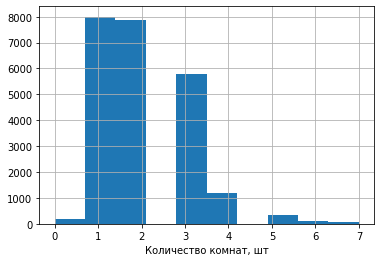

In [33]:
re_data['rooms'].hist(bins=10,range=(0,7))
plt.xlabel('Количество комнат, шт');

Видно, что чаще берут 1 комнатные и 2 комнатные квартиры

### Цена

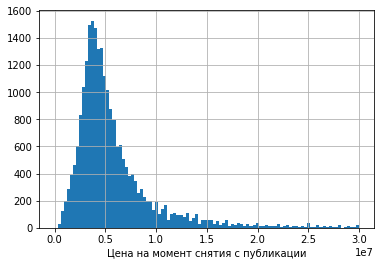

In [34]:
re_data['last_price'].hist(bins=100,range=(0,30000000))
plt.xlabel('Цена на момент снятия с публикации');

Гистограмма показывает, что недвижимость чаще покупается за 3-4 млн. руб 

### Высота потолков

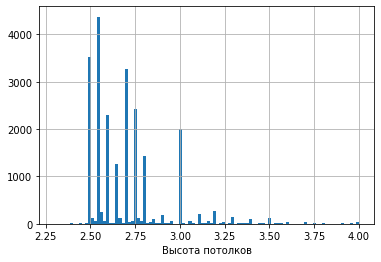

In [35]:
re_data['ceiling_height'].hist(bins=100,range=(2.3, 4))
plt.xlabel('Высота потолков');

Основные покупки выходят на квартиры с потолками от 2,5 до 2,75 м

### Срок продажи квартиры

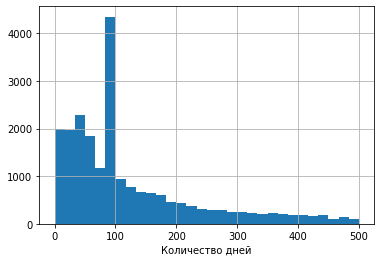

In [36]:
re_data['days_exposition'].hist(bins=30,range=(0,500))
plt.xlabel('Количество дней');

In [37]:
re_data['days_exposition'].describe()

count    23548.000000
mean       169.218915
std        206.463108
min          1.000000
25%         45.000000
50%         95.000000
75%        198.000000
max       1580.000000
Name: days_exposition, dtype: float64

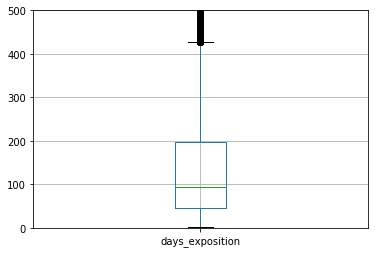

In [38]:
plt.ylim(0,500)
re_data.boxplot(column='days_exposition') 
plt.show()

Исследуя гистограмму продаж и диаграмму размаха можно видеть, что среднее время продажи квартиры 95 дней. Большая часть значений лежит за диапазоном 420 дней (1.5 межквартального размаха, добавленного к третьему квартилю). Это выглядит правдоподобным. Самыми быстрыми продажами можно назвать продажу в один день. Самой долгой продажей (если не брать во внимание выбросы, которые лежат за 1.5 межквартального размаха, добавленного в третьей квартилии)-427 дней.

In [39]:
# урали выбросы находящиеся за 1.5 межквартальным интервалом, добавленного к Q3
current_days_exposition_date = re_data.query('days_exposition < 420')

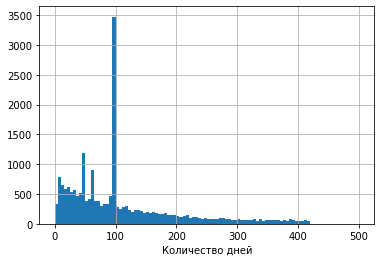

In [40]:
current_days_exposition_date['days_exposition'].hist(bins=100, range=(0,500))
plt.xlabel('Количество дней');

Убрали выбросы находящиеся за 1.5 межквартальным интервалом, добавленного к Q3. Всего наблюдается 4 пика. Самый большой пик- 95 дней, есть еще пики 50 дней, 70 дней и 10 дней. Сказать, что это артифакты, вполне это возможно. Большая часть выбросов лежит за диапазоном 420 дней и они стремяться к 0. Их можно убрать.

In [41]:
current_days_exposition_date['last_price'].describe()

count    2.113800e+04
mean     6.376823e+06
std      1.079836e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.600000e+06
75%      6.650000e+06
max      7.630000e+08
Name: last_price, dtype: float64

### Факторы влияющие на стоимость квартиры

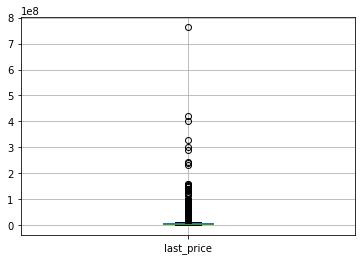

In [42]:
### Срок продажи квартирыplt.ylim(100000, 15000000)
current_days_exposition_date.boxplot(column='last_price')
plt.show()

Диограмма размаха показывает, что в выбросах есть недвижимость свыше 11 млн. руб.
Вполне возможно, такие квартиры существуют. Можно убрать значения начиная с 1.5 межквартального интервала Q3 = 11 х 10^6, правее все стремится к нулю.

In [43]:
# сделаем выборку и уберм выбросы квартир свыше 11 млн. руб
current_days_exposition_date = current_days_exposition_date.query('last_price<11*10**6')

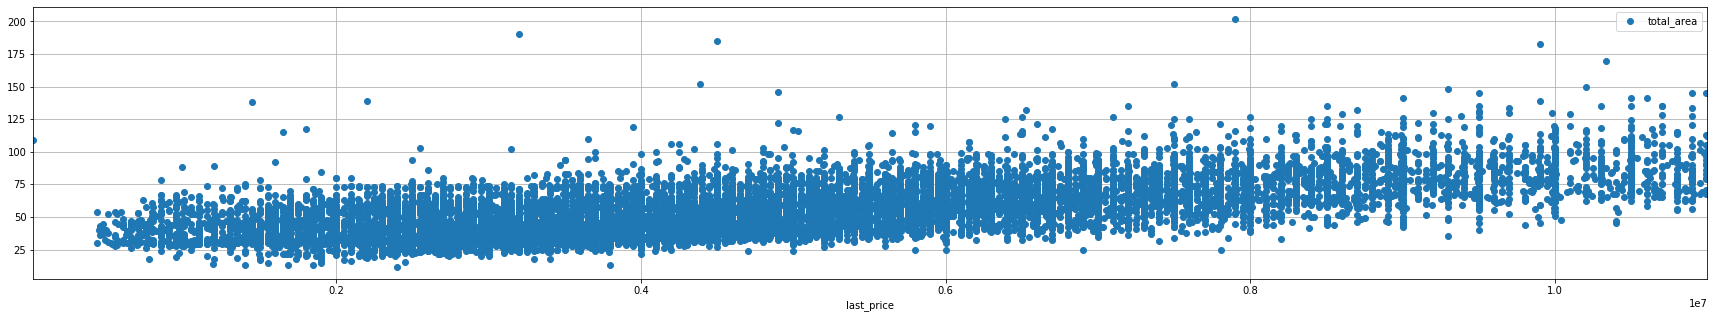

In [44]:
(current_days_exposition_date
    .sort_values(by='last_price', ascending=True)
    .plot(x='last_price', y='total_area', style='o', grid=True, figsize=(30,5))
)

In [45]:
current_days_exposition_date['last_price'].corr(current_days_exposition_date['total_area'])

0.6773174025929337

Положительная корреляция. При увеличении площади, увеличивается стоимость квартиры. Стоимость квартиры коррелирует с площадью на коэфф Пирсона 0.67. Велечины сильно зависят друг от друга

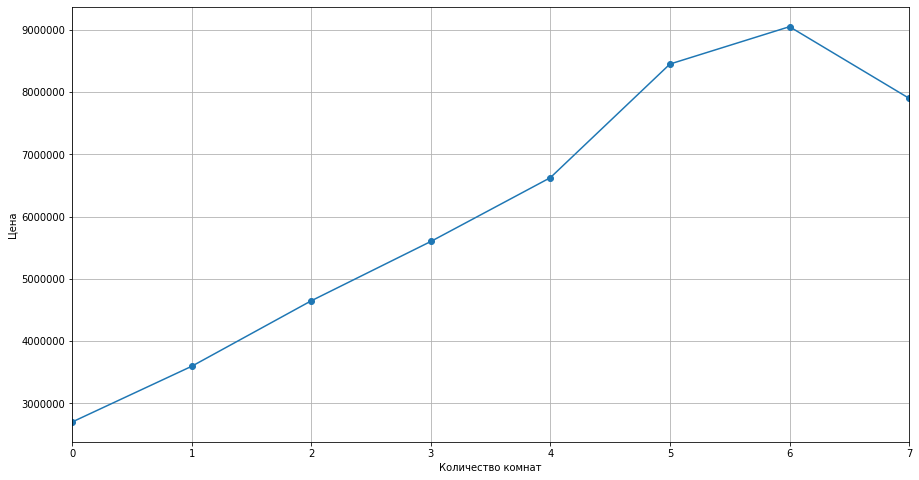

In [46]:
(current_days_exposition_date
     .groupby('rooms')['last_price'].median()
     .plot(x='rooms', y='last_price', style='o-', grid=True, figsize=(15,8), alpha=1)
)
plt.xlabel('Количество комнат')
plt.ylabel('Цена');

График показывает, что при увеливчении количества комнат, увеличивается и стоимость. С количеством комнат 7, она ниже, возможо спрос на такие квартиры не большой, либо мало данных по таки квартирам.

In [47]:
current_days_exposition_date['last_price'].corr(current_days_exposition_date["rooms"])

0.43819823667811564

Коэф Пирсона 0.43. Положительная корреляция цены и кол-ва комнат

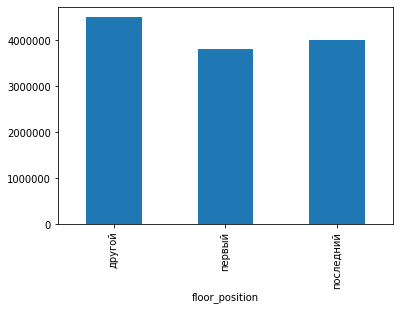

In [48]:
(current_days_exposition_date
    .groupby('floor_position')['last_price'].median()
    .plot(x='floor_position', y='last_price', kind='bar')
);

In [49]:
current_days_exposition_date['floor'].corr(current_days_exposition_date['last_price'])

0.14266652359498527

Цена почти не зависит от этажа. Видно, что цена за первый этаж немного ниже. Этот вывод подтверждает коэффицент Пирсона = 0.14 положительный

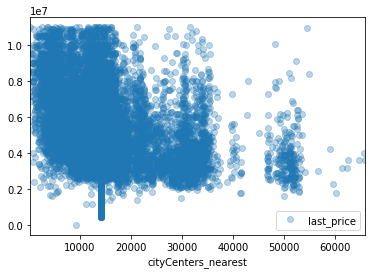

In [50]:
(current_days_exposition_date
     .sort_values(by='cityCenters_nearest', ascending=True)
     .plot(x='cityCenters_nearest', y='last_price', style='o', alpha=0.3)
);

In [51]:
current_days_exposition_date['cityCenters_nearest'].corr(current_days_exposition_date['last_price'])

-0.23416242172950122

Плотной цвета на графике показывает, что при увеличении расстояния, стоимость уменьшается не сильно. Об этом говорить и коэф Пирсона 0,23

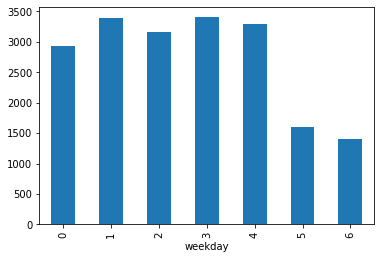

In [52]:
(current_days_exposition_date
     .groupby('weekday')['last_price'].count()
     .plot(x='weekday', y='last_price', kind='bar')
);

Сразу видно будни рабочие дни, так как основная продажа на них. В выходные конечно тоже есть, но в два раза меньше.

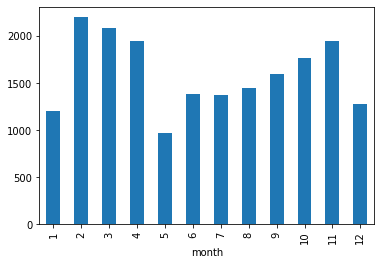

In [53]:
(current_days_exposition_date
     .groupby('month')['last_price'].count()
     .plot(x='month', y='last_price', kind='bar')
);

Из гистограммы видно, что объявления меньше всего закрываются в месяцы перед НГ в декабре и после НГ в январе. Много выходных и люди тратят деньги на подарки и отдых. В мае низко тоже из-зи праздников.

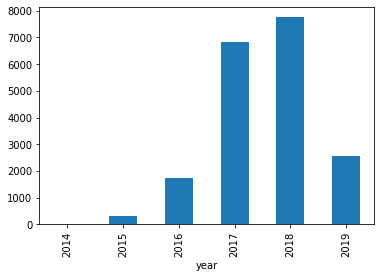

In [54]:
(current_days_exposition_date
     .groupby('year')['last_price'].count()
     .plot(x='year', y='last_price', kind='bar')
)

В 2017 и 2018 годах было больше всего покупок квартир

### Населенных пунктов с наибольшим числом объявлений

In [55]:
raiting_of_location = current_days_exposition_date.pivot_table(
    index='locality_name', values='price_per_square_meter', aggfunc=('count','median'))

raiting_of_location.sort_values(by='count', ascending=False).head(10)

,count,median
locality_name,,
Санкт-Петербург,12128,101785.70
посёлок Мурино,477,86042.60
посёлок Шушары,404,76986.15
Всеволожск,351,65789.50
Колпино,314,74349.65
Пушкин,305,98214.30
посёлок Парголово,300,91289.20
Гатчина,272,67746.30
деревня Кудрово,262,92044.85


Рейтинг 10 регионов с самым большом количеством объявлений и их средней стоимостью за 1 квадратный метр. В Санкт-Петербурге больше всего объявлений и самая большая стоимость 1 квадратный метр. Но это и не удивительно. Далее за ни следует Мурино и Шушары. Замыкает 10-ку Выборг. Интересно было бы узнать как сейчас на 2021 год.


### Исследование параметров объектов из центра Санкт-Петербурга

In [56]:
current_days_exposition_date['cityCenters_nearest_in_km'] = current_days_exposition_date['cityCenters_nearest'] / 1000
current_days_exposition_date['cost_of_km'] = current_days_exposition_date['last_price'] / current_days_exposition_date['cityCenters_nearest_in_km']
current_days_exposition_date['cost_of_km'] = current_days_exposition_date['cost_of_km'].astype('int64')

Добавим в таблицу столбец с расстоянием до центра в км. Посчитаем стоимость 1 кв м для всех объектов.

In [57]:
spb_region = current_days_exposition_date.query('locality_name == "Санкт-Петербург"')
spb_region.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,days_exposition,last_price_m2,price_per_square_meter,weekday,month,year,floor_position,living_area_ratio,kitchen_area_ratio,cityCenters_nearest_in_km,cost_of_km
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.000000,13,True,False,...,121,312500.000000,100000.0,1,6,2018,другой,0.320,0.410,8.098,1234872
7,5,7915000.0,71.6,2019-04-18,2,2.75,24,36.816736,22,True,False,...,95,214983.753514,110544.7,3,4,2019,другой,0.514,0.264,11.634,680333
9,18,5400000.0,61.0,2017-02-26,3,2.50,9,43.600000,7,True,False,...,289,123853.211009,88524.6,6,2,2017,другой,0.715,0.107,15.008,359808
10,5,5050000.0,39.6,2017-11-16,1,2.67,12,20.300000,3,True,False,...,137,248768.472906,127525.3,3,11,2017,другой,0.513,0.215,13.878,363885
15,16,4650000.0,39.0,2017-11-18,1,2.60,14,20.500000,5,True,False,...,19,226829.268293,119230.8,5,11,2017,другой,0.526,0.195,14.259,326109


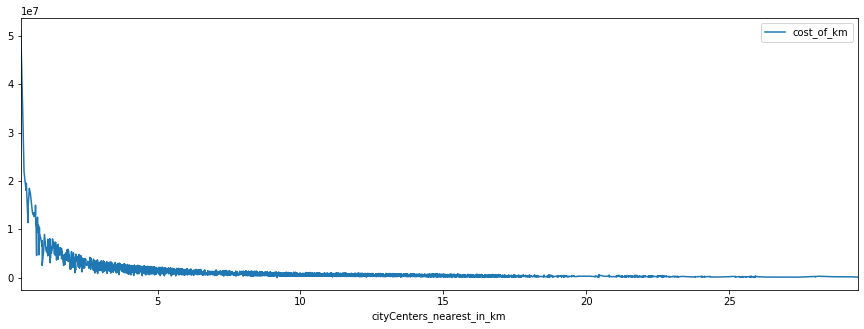

In [58]:
(spb_region
     .sort_values(by='cityCenters_nearest_in_km', ascending=True)
     .plot(x='cityCenters_nearest_in_km', y='cost_of_km', style='-', figsize=(15,5))
);

График зависимости цены 1 кв м от расстояния в регионе. Видно, что после 5 км от центра цена почти не меняется и идет плотной линией.

In [59]:
spb_region = spb_region.query('cityCenters_nearest_in_km < 5')
len(spb_region)

1004

1004 объявлений квартир находящихся в центре

In [60]:
spb_region.sort_values(by='cost_of_km', ascending=False).head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,days_exposition,last_price_m2,price_per_square_meter,weekday,month,year,floor_position,living_area_ratio,kitchen_area_ratio,cityCenters_nearest_in_km,cost_of_km
8614,7,10990000.0,100.0,2015-12-16,3,3.90,5,37.800000,3,True,False,...,265,290740.740741,109900.0,2,12,2015,другой,0.378,0.116,0.215,51116279
1934,18,9590000.0,108.0,2017-05-23,2,3.30,5,59.000000,2,False,False,...,69,162542.372881,88796.3,1,5,2017,другой,0.546,0.102,0.287,33414634
1182,1,5800000.0,33.6,2016-03-10,1,3.70,7,22.800000,4,False,False,...,167,254385.964912,172619.0,3,3,2016,другой,0.679,0.196,0.208,27884615
22036,3,7200000.0,72.0,2017-12-21,2,3.07,3,44.900000,2,True,False,...,89,160356.347439,100000.0,3,12,2017,другой,0.624,0.171,0.329,21884498
9488,3,8000000.0,106.0,2018-07-26,3,3.40,4,37.212114,1,True,False,...,60,214983.753514,75471.7,3,7,2018,первый,0.351,0.085,0.410,19512195
5747,3,9500000.0,81.0,2016-05-17,2,3.00,4,41.000000,2,True,False,...,159,231707.317073,117284.0,1,5,2016,другой,0.506,0.198,0.515,18446601
2609,20,7200000.0,80.0,2017-08-24,3,2.80,4,43.000000,1,True,False,...,11,167441.860465,90000.0,3,8,2017,первый,0.538,0.100,0.399,18045112
8416,18,9555000.0,65.0,2018-12-10,3,3.30,4,43.900000,2,True,False,...,95,217653.758542,147000.0,0,12,2018,другой,0.675,0.092,0.552,17309782
12252,8,10900000.0,109.7,2016-03-24,4,3.17,6,71.900000,3,False,False,...,320,151599.443672,99361.9,3,3,2016,другой,0.655,0.114,0.730,14931506
3800,12,6900000.0,47.6,2015-07-22,2,2.55,5,28.200000,5,True,False,...,398,244680.851064,144958.0,2,7,2015,последний,0.592,0.172,0.472,14618644


Cамые высокие стоимости за квадратный метр квартиры в регионе

In [61]:
top = current_days_exposition_date.query('cityCenters_nearest_in_km < 5 and locality_name == "Санкт-Петербург"')
top.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,days_exposition,last_price_m2,price_per_square_meter,weekday,month,year,floor_position,living_area_ratio,kitchen_area_ratio,cityCenters_nearest_in_km,cost_of_km
24,8,6500000.0,97.2,2015-10-31,2,2.80,3,46.5,1,True,False,...,265,139784.946237,66872.4,5,10,2015,первый,0.478,0.202,2.336,2782534
99,32,9600000.0,90.0,2017-09-26,4,2.55,5,67.0,2,True,False,...,104,143283.582090,106666.7,1,9,2017,другой,0.744,0.089,2.818,3406671
136,16,6500000.0,51.8,2018-08-01,2,3.45,6,25.6,2,True,False,...,163,253906.250000,125482.6,2,8,2018,другой,0.494,0.141,3.618,1796572
138,8,4800000.0,40.0,2017-11-18,2,2.80,3,29.0,2,True,False,...,80,165517.241379,120000.0,5,11,2017,другой,0.725,0.150,2.913,1647785
154,1,8200000.0,80.0,2018-11-06,3,4.15,3,44.2,2,True,False,...,38,185520.361991,102500.0,1,11,2018,другой,0.552,0.152,3.167,2589201


Рассмотрим квартиры в центре

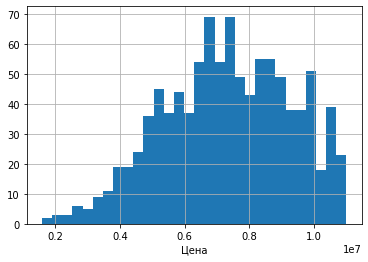

In [62]:
top['last_price'].hist(bins=30)
plt.xlabel('Цена');

На графике видно, что больше всего квартир за 7 млн руб 

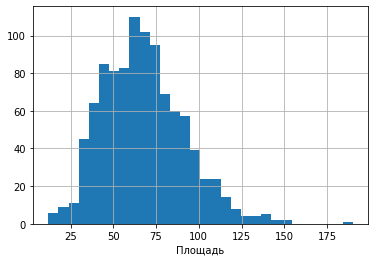

In [63]:
top['total_area'].hist(bins=30)
plt.xlabel('Площадь');

В основном площадь квартир от 60 до 70 кв метров

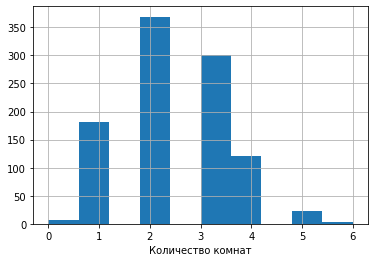

In [64]:
top['rooms'].hist(bins=10)
plt.xlabel('Количество комнат');

Больше всего двухкомнатных квартир

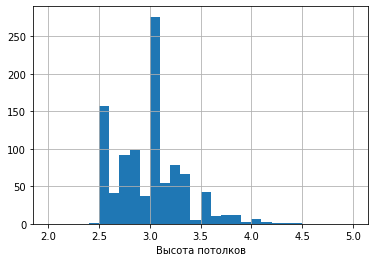

In [65]:
top['ceiling_height'].hist(bins=30, range=(2,5))
plt.xlabel('Высота потолков');

Большая часть квартир с потолками высотой 3 метра. Очень похоже на центр Санкт-Петербурга

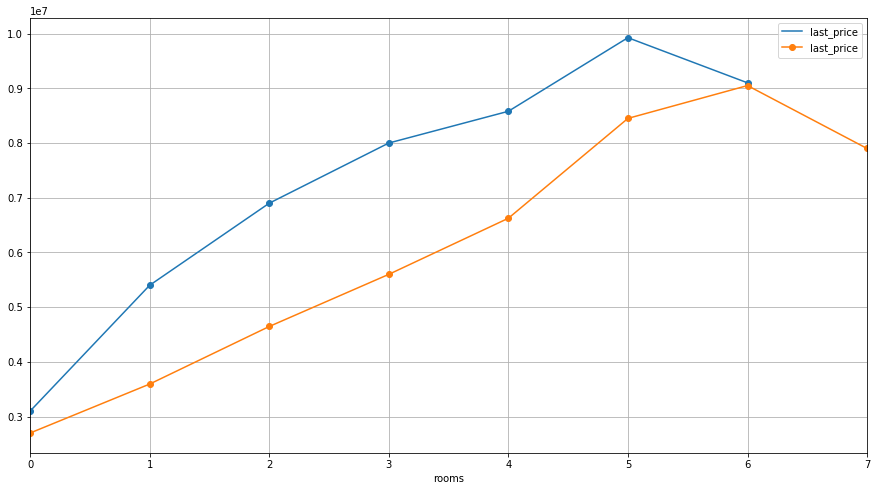

In [66]:
(top
     .sort_values(by='last_price',ascending=True)
     .groupby('rooms')['last_price'].median()
     .plot(x='rooms', y='last_price', style='o-', grid=True, figsize=(15,8), legend=True)
)

(current_days_exposition_date
     .groupby('rooms')['last_price'].median()
     .plot(x='rooms', y='last_price', style='o-', grid=True, figsize=(15,8), legend=True)
)
plt.show()

На графике видно, что с увеличением комнат увеличивается стоимость. График квартир в центре сдвинут вверх отностительно всех квартир, тк в центре квартиры дороже. Самые дорогие 5 комнатные квартиры

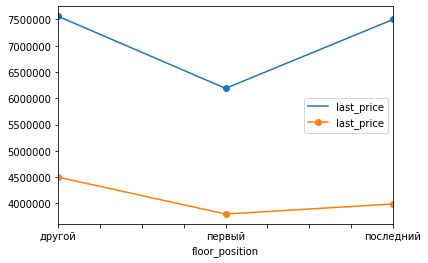

In [67]:
(top
    .groupby('floor_position')['last_price'].median()
    .plot(x='floor_position', y='last_price', style='o-', legend=True)
)

(current_days_exposition_date
    .groupby('floor_position')['last_price'].median()
    .plot(x='floor_position', y='last_price', style='o-', legend=True)
)
plt.show()

Квартиры на первом этаже и на последенем берут реже чем на других этажах

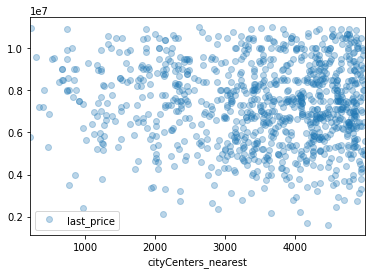

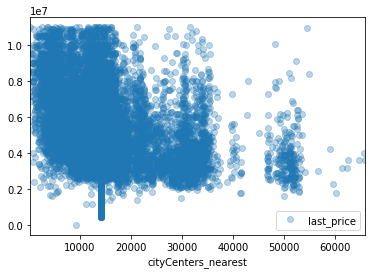

In [68]:
(top
     .sort_values(by='cityCenters_nearest',ascending=True)
     .plot(x='cityCenters_nearest', y='last_price', style='o', alpha=0.3)
)

(current_days_exposition_date
     .sort_values(by='cityCenters_nearest',ascending=True)
     .plot(x='cityCenters_nearest', y='last_price', style='o', alpha=0.3)
)
plt.show()

По верхней гистограмме видно, что больше всего квартир на расстоянии 4-5км и стоят они от 6-8 млн. руб

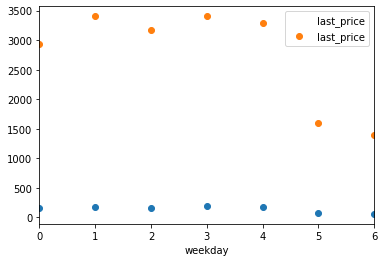

In [69]:
(top
     .groupby('weekday')['last_price'].count()
     .plot(x='weekday', y='last_price', style='o', legend=True)
)

(current_days_exposition_date
     .groupby('weekday')['last_price'].count()
     .plot(x='weekday', y='last_price', style='o', legend=True)
)
plt.show()

В течении недели квартиры продаются примерно одинаково. В субботу и в воскресенье сильно меньше.

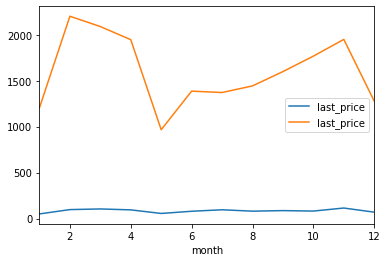

In [70]:
(top
     .groupby('month')['last_price'].count()
     .plot(x='month', y='last_price', style='-', legend=True)
)

(current_days_exposition_date
     .groupby('month')['last_price'].count()
     .plot(x='month', y='last_price', style='-', legend=True)
)
plt.show()

В течении года квартиры в центре продаются примерно одинаково.

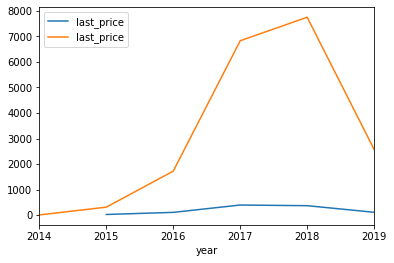

In [71]:
(top
     .groupby('year')['last_price'].count()
     .plot(x='year', y='last_price', style='-', legend=True)
)

(current_days_exposition_date
     .groupby('year')['last_price'].count()
     .plot(x='year', y='last_price', style='-', legend=True)
)
plt.show()

По графику можно сказать, что в 2018 году был подъем продаж. В целом квартиры c центре не сделали основные продажи в тот год.

### Вывод

Зависимость стоимости квартиры от числа комнат в центре Санкт-Петербурга сильнее: здесь больше платежеспособного спроса на 5-комнатные квартиры, что приводит к прямо пропорциональной зависимости цены от числа комнат. Другими словами, 5-комнатные квартиры в центре Санкт-Петербурга, как правило, будут продаваться дороже, чем 4-комнатные.
Кроме того, в центре города наблюдается явно выраженная зависимость от этажа квартиры: квартира на последнем этаже в среднем будет стоить дороже, чем на первом. Это не наблюдается в явном виде в окрестностях центра.
Чем дальше от центра города, тем в среднем квартира будет стоить дешевле: в среднем разница в стоимости между первым и восьмым километром от центра может достигать 2 млн руб.
Странным образом квартиры, объявления о продаже которых публиковались по воскресеньям, продавались в среднем по более высокой цене. То же верно и для объявлений, опубликованных в начале весны и начале осени (в марте и сентябре соответственно) в период 2015-2019 гг.: в среднем такие квартиры продавались дороже.

Как правило, продажа недвижимости занимала 3 месяца (95 дней). При этом четверть всех объектов недвижимости была продана в течение 45 дней с момента публикации. Если объект был продан в течение месяца, то необходимо проверить данную сделку на предмет мошенничества. Такая проверка особенна критична, если срок сделки не превышает двух недель. Кроме того, если объект был продан только после 420 дней с момента публикации, это говорит об аномально долгой продаже.
Тривиально, наиболее сильная корреляция наблюдается между площадью квартиры и ее стоимостью (коэфф. корреляции 0,68).
Стоимость квартиры также напрямую зависит от числа комнат: чем их больше, тем квартира дороже. Но это верно, пока число комнат не превышает четырех: 5- или 6-комнатные квартиры могут быть проданы дешевле 4-комнатных, и вызвано это скорее всего отсутствием спроса.
Квартиры на первом или последнем этаже обычно продаются по более низкой цене, чем квартиры на других этажах.
День недели и месяц публикации объявления не играют значимой роли на стоимость, по которой объект недвижимости будет продан.
Из представленных 10 населенных пунктов с наибольшим числом объявлений лидеры по средней цене квадратного метра: Санкт-Петербург, посёлок Мурино, посёлок Шушары. Однако в среднем дешевле всего квадратные метры в Выборге.

## Общий вывод

Если обобщить все данные, то можно сделать вывод, что больше всего квартир продается в будние дни,1-3 комнатные квартиры, на любом, кроме первого и последнего этажа, с высотой потолка 2,6 м за цену около 3-4 млн. руб. Увидели, что цена кв. зависет от этажа, района, от высоты потолка и от кол-ва комнат. Корреляция этих параметров в центре похоже и для всех квартир.

Для определения рыночной стоимости объектов недвижимости важны следующие параметры:
- общая площадь квартиры
- расстояние до центра города
- число комнат и этаж квартиры (чем ближе к центру, тем эти факторы весомее)
- срок продажи квартиры (слишком быстрая продажа — до 1 месяца (особенно аномальные сроки меньше 2-х недель), слишком долгая - - продажа — более 420 дней).
- кроме того, необходимо ввести ограничения на ввод данных о высоте потолков: допущено множество ручных ошибок (27 м вместо 2,7 м, потолки менее 2 м и т.д.).